In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def activation_step(value):
    return 1 if value >= 0 else 0

def make_prediction(inputs, w, b):
    linear_output = np.dot(inputs, w) + b
    return activation_step(linear_output)

def perceptron_training(X, y, num_epochs=10, lr=0.1):
    w = np.zeros(X.shape[1])
    b = 0

    for epoch in range(num_epochs):
        for i in range(len(X)):
            pred = make_prediction(X[i], w, b)
            error = y[i] - pred
            w += lr * error * X[i]
            b += lr * error
    return w, b

def visualize_boundary(X, y, w, b, chart_title):
    x_vals = np.array([0, 1])
    y_vals = -(w[0] * x_vals + b) / w[1]
    plt.plot(x_vals, y_vals, label='decision boundary')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='PiYG')
    plt.title(chart_title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.legend()
    plt.show()

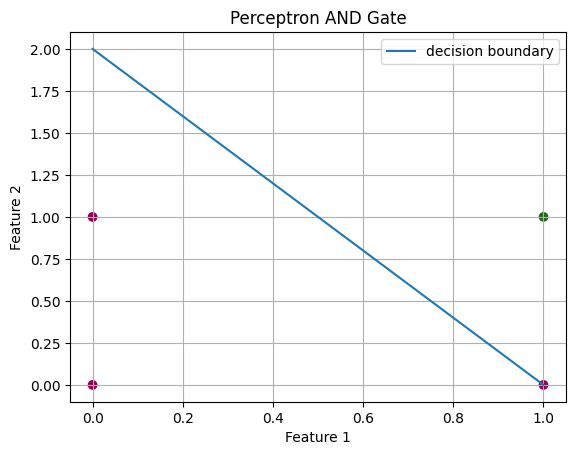

In [2]:
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target_output = np.array([0, 0, 0, 1])


w, b = perceptron_training(input_data, target_output)


visualize_boundary(input_data, target_output, w, b, "Perceptron AND Gate")


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

cancer_data = load_breast_cancer()
dataframe = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
dataframe['label'] = cancer_data.target

features = dataframe.drop('label', axis=1).values
labels = dataframe['label'].values

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

neural_net = tf.keras.Sequential([
    tf.keras.Input(shape=(features.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

neural_net.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.AUC()
    ]
)

In [4]:
training_history = neural_net.fit(X_train, y_train,
                                   epochs=50,
                                   batch_size=16,
                                   validation_split=0.1,
                                   verbose=0)

loss_val, acc, prec, rec, auc_score = neural_net.evaluate(X_test, y_test, verbose=0)

print(f"Loss: {loss_val:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"AUC: {auc_score:.4f}")

predictions_prob = neural_net.predict(X_test)
predictions = (predictions_prob > 0.5).astype(int)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Loss: 0.0802
Accuracy: 0.9912
Precision: 0.9861
Recall: 1.0000
AUC: 0.9987
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[42  1]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

